In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import scipy
from scipy.stats import zscore
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
#read csv
df=pd.read_csv("C:\\Users\\irichter\\Desktop\\MEng\\KaggleCraigsList\\vehicles.csv") 

In [3]:
#remove unnecessary columns 
df= df.drop(["id","url","county","region_url","cylinders","fuel","size","image_url","description","region","title_status","transmission","VIN","drive","type"],axis=1)
#remove NaN values 
df_clean= df.dropna()

In [4]:
#filter to only data from 2000s 
df= df_clean[df_clean['year']>= 2000]

In [5]:
#remove vehicle sales over $1mil
df= df[df['price']<1000000]

C:\Tesla\py_test_env39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

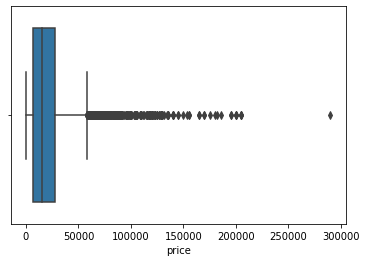

In [6]:
#Data Visualization 
#see price range before minimizing dataset to zscores under |3|
sns.boxplot(df['price'])

In [7]:
#Shape data to only include within 3 stdev from the mean 
#resource: https://www.adamsmith.haus/python/answers/how-to-remove-outliers-from-a-pandas-dataframe-in-python
abs_z_scores = np.abs(scipy.stats.zscore(df['price']))
df= df[abs_z_scores<3]

C:\Tesla\py_test_env39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

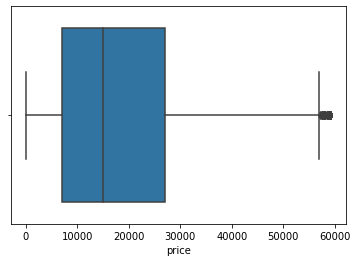

In [8]:
#Data Visualization: Boxplot after shaping 
sns.boxplot(df['price'])

<AxesSubplot:xlabel='price', ylabel='Count'>

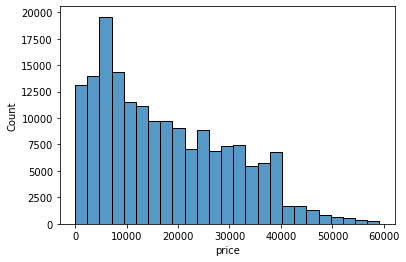

In [9]:
#Data Visualization: Histogram
sns.histplot(data=df, x="price",bins= 25)

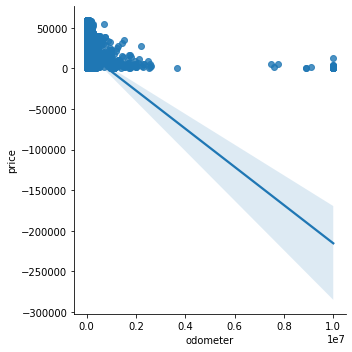

In [10]:
#Data Visualizastion: plot to find outliers of each input 
sns.lmplot(x="odometer", y="price", data=df)
#note: this tells us we need to further trim data by odometer readings under 2mil 

In [11]:
#Reduce dataset to reasonable odometer readings 
df= df[df['odometer']<500000]

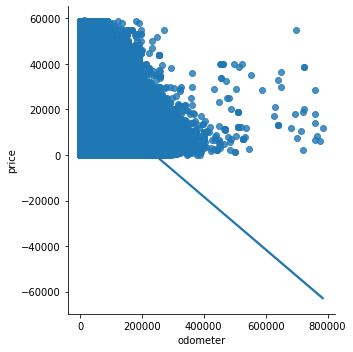

In [12]:
#replot
sns.lmplot(x="odometer", y="price", data=df)

In [ ]:
#FAST SALE: pull data only from current season 
#MOST MONEY: make geographic radius bigger by x amount 
#NO PREFERENCE: don't expand geographic radius and don't limit seasons 

In [13]:
#filter data based on user input location 
#if MOST MONEY, add x to each location filter 
min_lat= 32
max_lat= 50
df= df[df['lat'].between(min_lat,max_lat)]

min_long= -85
max_long= 80
df= df[df['long'].between(min_long,max_long)]

In [ ]:
#append column representing season 
#months Spring:[3,4,5] Summer: [6,7,8] Fall: [9,10,11] Winter:[12,1,2]

In [ ]:
#if FAST SALE: filter out to only current season 

In [14]:
predictors = ['year', 'odometer']
X = df[predictors]
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
regressor= LinearRegression()
regressor.fit(X_train, y_train)
print(regressor.intercept_)
print(regressor.coef_)

-2149738.489628638
[ 1.08000866e+03 -6.77496835e-02]


In [15]:
#Review Model Accuracy 
y_pred = regressor.predict(X_test)
df_comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_comparison

,Actual,Predicted
342977,9995,12944.978702
263990,5995,8481.902540
361697,34590,28306.008915
296729,18500,18011.118706
86961,6995,18780.969320
...,...,...
86041,6950,11017.296957
196411,16995,15109.524301
330695,6700,10121.014473
333712,12900,19617.452742
